Na podstwie ostatnich 5 przewidzieć kolejną jedna -- wejsscie to deltta t i zmiana kursu



Dane zrobic w fromie 5 danych i wynik , potemm je poshuflowac
wyrzucic zmiany dluzsze niz dzien
mozna zsporbowac dane gdzie nic sie nie zmienilo tez wyrzucic 

# TO DO:

1. zmienic close na cours change w prepare_day DONE
2. zamineic df na numpy array DONE
3. przetestowac wyjatek w prepare_day
4. podzielic miesiace na grupy 6,1,3,1 DONE
4. przetestowac inne modele, w liniowym sprobowac zrobic binaryny output

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_test_path='../data/df_test'
df_train_path='../data/df_train'

# Prediction

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, model_selection, svm
import numpy as np

## Load data

In [29]:
df_test=pd.read_pickle(df_test_path)
df_train=pd.read_pickle(df_train_path)

In [30]:
seed=42

In [31]:
def df_to_array(df,shuffle=True,seed=seed):
    '''
    Takes dateframe and returns numpy arrays X,y
    '''
    if shuffle:
        df = df.sample(random_state=seed,frac=1).reset_index(drop=True)
    X = np.array(df[[x for x in df.columns if 'Time' in x or 'Cours' in x]])
    y =  np.array(df.y)
    return X, y

In [32]:
X_test,Y_test=df_to_array(df_test)
X_train,Y_train=df_to_array(df_train)

In [33]:
X_test.shape

(1500539, 10)

In [34]:
X_train.shape

(3052874, 10)

In [35]:
Y_train.shape

(3052874,)

In [36]:
Y_test.shape

(1500539,)

## Add normalization

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_test)
rescaledX_test= scaler.transform(X_test)
rescaledX_train=scaler.transform(X_train)
# summarize transformed data
np.set_printoptions(precision=3)

In [13]:
X_train=rescaledX_train
X_test=rescaledX_test

In [14]:
# Training
clf = LinearRegression()
clf.fit(X_train,Y_train)
# Testing
confidence = clf.score(X_test, Y_test)
print("confidence: ", confidence)

confidence:  0.10758349085261255


In [15]:
forecast_prediction = clf.predict(X_test[:10])
print(forecast_prediction,'\n',Y_test[:10])

[-0.022  0.036  0.001  0.01   0.028  0.     0.007  0.018 -0.012 -0.023] 
 [ 0.    0.    0.    0.04 -0.05  0.    0.05  0.    0.    0.1 ]


In [16]:
a=X_test[:-5]
print(a)
print(Y_test[:-5])

[[-1.361e-01 -4.283e-03  1.767e+00 ...  4.303e-01  2.357e+00 -2.356e-01]
 [ 4.639e+00 -1.186e+00 -4.233e-03 ...  1.460e+00  1.176e+00 -3.574e-01]
 [-1.955e-01 -4.283e-03 -4.233e-03 ... -3.164e-01 -4.339e-03 -3.776e-01]
 ...
 [-3.343e-01 -4.283e-03 -4.233e-03 ... -3.365e-01  1.176e+00 -1.139e-01]
 [-2.946e-01 -4.283e-03  2.357e+00 ... -3.971e-01  2.357e+00  1.498e-01]
 [-3.937e-01 -4.283e-03  5.862e-01 ... -3.971e-01  5.861e-01 -2.965e-01]]
[ 0.   0.   0.  ...  0.  -0.2  0. ]


In [17]:
clf.predict(a)

array([-0.022,  0.036,  0.001, ...,  0.   , -0.03 , -0.006])

# More models

In [18]:
from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Test options and eveluation metric

In [37]:
num_folds=10
scoring='neg_mean_squared_error'


# Spot-check algorithms

In [38]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
# models.append(('KNN',KNeighborsRegressor()))
# models.append(('CART',DecisionTreeRegressor()))
# models.append(('SVR',SVR()))

# Evaluate models

## Start with smaller sets

In [39]:
# X_train=X_train[:100000]
# Y_train=Y_train[:100000]

'LR': -0.007317 (0.000037)
'LASSO': -0.008525 (0.000045)
'EN': -0.008525 (0.000045)


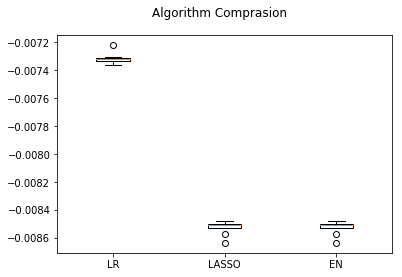

In [40]:
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

fig=plt.figure()
fig.suptitle('Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Standardize the data

In [ ]:
piplines=[]
piplines.append(('ScaledLR',Pipeline([('Scaler',StandardScaler()),('LR',LinearRegression())])))
piplines.append(('ScaledLASSO',Pipeline([('Scaler',StandardScaler()),('LASSO',Lasso())])))
piplines.append(('ScaledEN',Pipeline([('Scaler',StandardScaler()),('EN',ElasticNet())])))
# piplines.append(('ScaledKNN',Pipeline([('Scaler',StandardScaler()),('KNN',KNeighborsRegressor())])))
piplines.append(('ScaledCART',Pipeline([('Scaler',StandardScaler()),('CART',DecisionTreeRegressor())])))
piplines.append(('ScaledSVR',Pipeline([('Scaler',StandardScaler()),('SVR',SVR())])))

results=[]
names=[]
for name, model in piplines:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    message="%a: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(message)

In [ ]:
fig=plt.figure()
fig.suptitle('Algorithm Comprasion')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()